- 스트라이드(stride): 디폴트 값은 1이다.// 커널의 이동범위임 
- 커널 안의 값들은 정해진 것이 아니다.
- 최대 풀링을 많이 사용한다.
- 필터의 사이즈는 3*3이 가장 성능적으로 우수하다.

### 컨볼루션 및 맥스풀링 구현 예제

original_image_size =  28
output size =  26


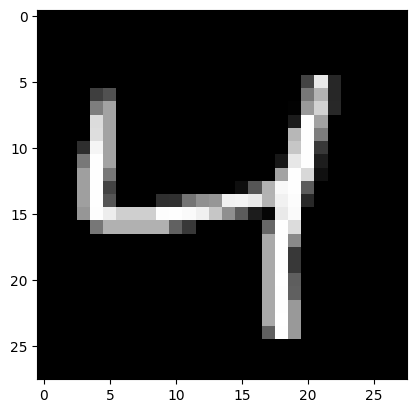

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# mnist data download

(x_train, t_train), (x_test, t_test) = mnist.load_data() # mnist => 손글씨 데이터
plt.imshow(x_train[2], cmap='gray') 

import numpy as np
horizontal_filter = np.array([[1., 1., 1.],  # 이런 값을 찾아내는 작업이 컨볼루션 연산이라고 생각하면된다.
                              [0., 0., 0.], 
                              [-1., -1., -1.]])
vertical_filter = np.array([[1., 0., -1.],
                            [1., 0., -1.],
                            [1., 0., -1.]])
test_image = x_train[2] 
original_image_size = test_image.shape[0] # shape[0] => 행 높이
print("original_image_size = ", original_image_size)
conv_output_size = int((original_image_size - 3)/1 + 1)# 필터 사이즈를 3행 3열로 할거라서 3이라고 함
print('output size = ', conv_output_size) 



In [2]:
filter_size = 3 # 커널사이즈가 됨(갯수 아님)

def get_conv_image(filter):
    filtered_image = np.zeros((conv_output_size, conv_output_size))
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            
            # 합성곱 연산
            
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter # 동일한 위치의 데이터를 곱하는 것이다.(행렬곱 아님)
            indice_sum = np.sum(indice_image)
            if(indice_sum > 255): # 색상값이 255보다 큰 값이 나올 수도 있다.
                indice_sum = 255 # 고로 255 보다 큰 경우에는 255로 처리하겠다.
            filtered_image[i, j] = indice_sum
    return filtered_image 




In [3]:
# 누가 강조되는지 알아야 한다.
vertical_filtered_image = get_conv_image(vertical_filter)
horizontal_filtered_image = get_conv_image(horizontal_filter)


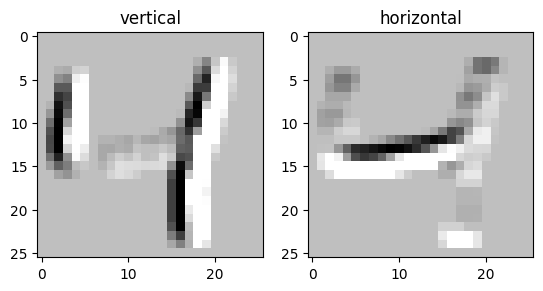

In [4]:
plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()

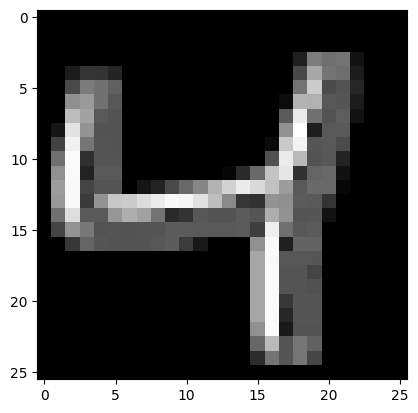

In [5]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image)) 
plt.imshow(sobel_image,cmap='gray')

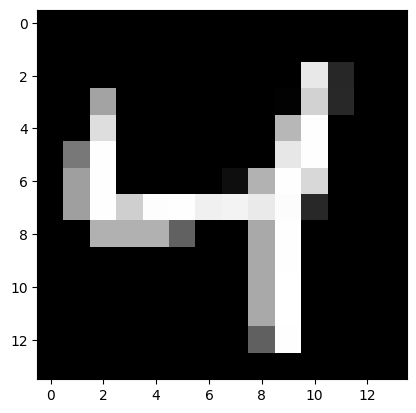

In [6]:
# 맥스풀링 # 풀 사이즈가 2행 2열 구조라고 생각하면 된다.
# 풀링 연산한 것을 직접 구하는 내용이다.
# 컨볼루션하고 풀링을 반복하면 딱 그 표현하는 그 부분만 남는다
import numpy as np

image = x_train[2] 
image_x = image.shape[0]
image_y = image.shape[1]

new_image_x = int(image_x / 2) 
new_image_y = int(image_y / 2) 

pooled_image = np.zeros((new_image_x, new_image_y)) # pooled_image는 14행 14열 구조가 된다.

for x in range(0, image_x, 2):
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2]) # pool_size(2,2)
plt.imshow(pooled_image, cmap='gray')

## CNN 예제-1
 #### tensorflow의 keras 사용
 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
mnist = tf.keras.datasets.mnist # Mnist 데이터 로드(손글씨 데이터)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 전처리 (정규화 작업)

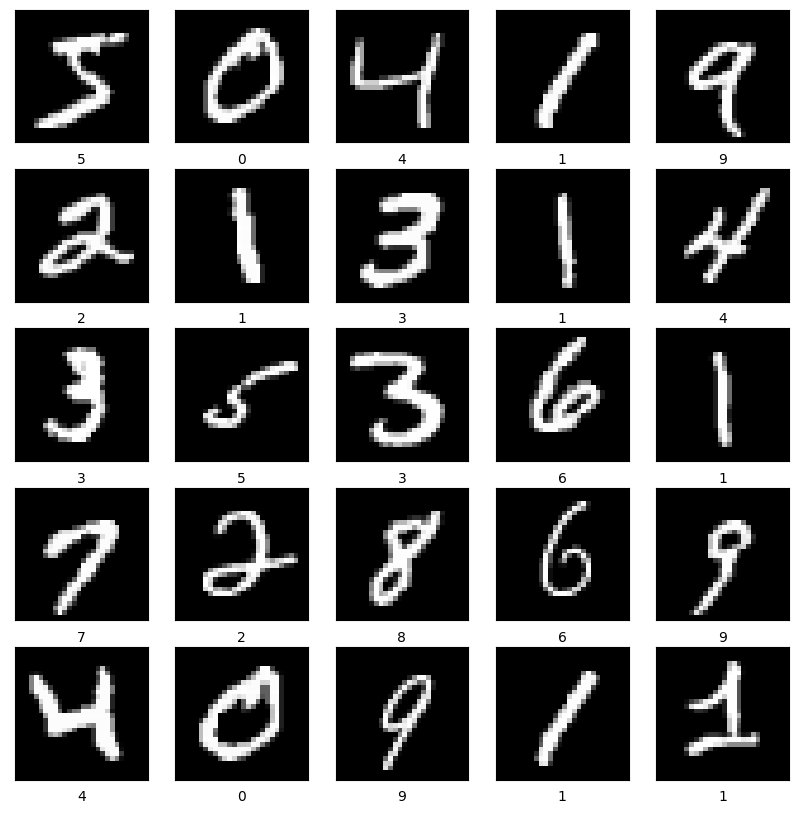

In [8]:
plt.figure(figsize=(10,10))
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
plt.show()

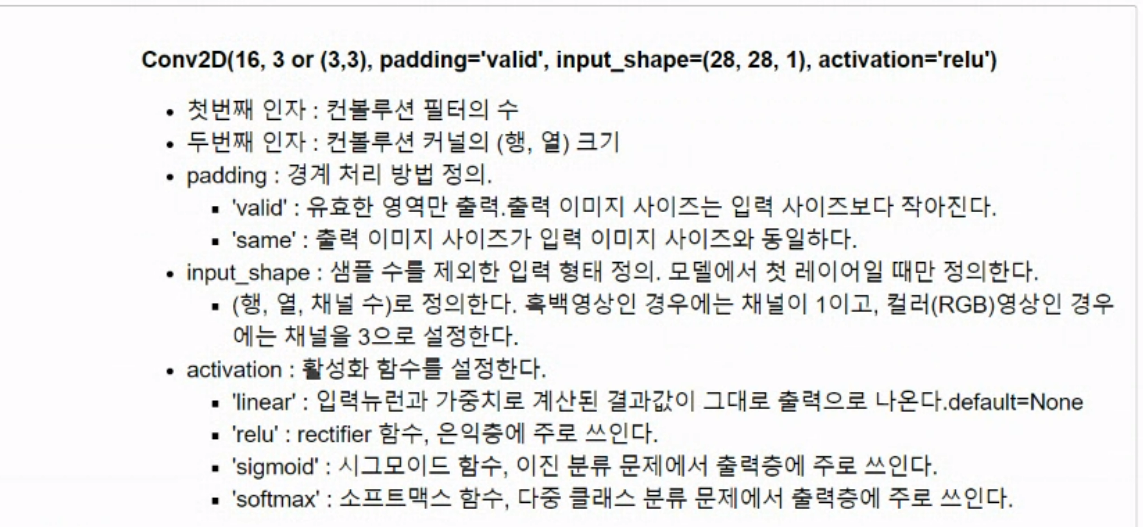
- valid라고 기술하면 패딩을 하지않겠다는 의미이다.

In [11]:
# Sequential 사용
model = tf.keras.models.Sequential([
    # 특징을 추출하는 과정
    tf.keras.layers.Reshape((28, 28, 1)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),  # 사이즈는  3행 3열 구조
    # 분류하는 과정
    tf.keras.layers.Flatten(), # Flatten => 입력층 설계시 사용한다.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # softmax => 소프트 맥스 함수를 사용하고 있다. 
])

In [12]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5) # batch_size 가 생략된 구조 , 디폴트 값은 32이다.
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1489 - accuracy: 0.9556
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0469 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0249 - accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step 

[0.05416995286941528, 0.9853000044822693]

#### function API 사용

In [14]:
inputs = keras.Input(shape=(28, 28))
x = layers.Reshape((28, 28, 1))(inputs)
x = layers.Conv2D(16, 3, activation='relu')(x) # 위의 x를 이 연산을할 때 파라메타로 사용함
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1384576   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,026
Trainable params: 1,386,026
Non-train

In [15]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2) # verbose => 함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 나타낸다.( verbose = 0 : 출력x, verbose = 1: 자세히 보기, verbose =2 : 함축적인 것만 보기)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1480 - accuracy: 0.9550
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0639 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0441 - accuracy: 0.9855
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step 

[0.07272705435752869, 0.9803000092506409]

In [16]:
# pooling 사용
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

In [17]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               346240    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1629 - accuracy: 0.9528
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0563 - accuracy: 0.9827
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0365 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - lo

In [20]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0435 - accuracy: 0.9866 - 613ms/epoch - 2ms/step


[0.04346649721264839, 0.9865999817848206]

In [21]:
# 조금 더 깊은 layer
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))) # kernel_size => 생략가능하다  // None => 명시된 것이 없으므로
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Flatten => 입력작업 
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [22]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1808 - accuracy: 0.9464
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0584 - accuracy: 0.9821
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0405 - accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - lo

In [24]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0448 - accuracy: 0.9857 - 930ms/epoch - 3ms/step


[0.044780537486076355, 0.9857000112533569]

In [25]:
# padding의 유무 ( 입력사이즈를 그대로 유지하기 위해서 가장자리 바깥을 채워주는 작업)


model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), 
padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding="same")) # 앞의 예제와 비교해서  padding="same" 이게 추가가 됨
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [26]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [27]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1709 - accuracy: 0.9488
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0391 - accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - lo

In [28]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0346 - accuracy: 0.9896 - 1s/epoch - 3ms/step


[0.03456373140215874, 0.9896000027656555]

### cnn 실습예제-2
- 이미지 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [3]:
# 데이터 로드 
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

train_images = train_images.reshape((50000, 32, 32, 3)) # 3 => 커넬 이미지
test_images = test_images.reshape((10000, 32, 32, 3))

print("Train samples(reshape):", train_images.shape, train_labels.shape)
print("Test samples(reshape):", test_images.shape, test_labels.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))

170498071/170498071 [==============================] - 19s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)
Train samples(reshape): (50000, 32, 32, 3) (50000, 1)
Test samples(reshape): (10000, 32, 32, 3) (10000, 1)


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

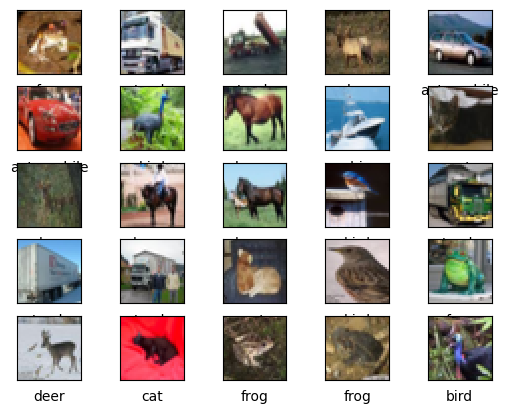

In [4]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
# 전처리 작업
train_images = train_images/255.0 # 색상값 때문에
test_images = test_images/255.0

In [6]:
# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# 1563 5만건을 32로 나눔

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5370 - accuracy: 0.4365
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1606 - accuracy: 0.5897
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0106 - accuracy: 0.6447
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/s

In [8]:
predictions = model.predict(test_images) 
# 테스트 이미지 데이터 갯수 1만개 , 예측데이터 구조 1만행 10열 구조(종류가 10가지 있었으므로)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 4s 12ms/step


In [9]:
def plot_image(i, predictions_array, true_label, img): # 
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
        

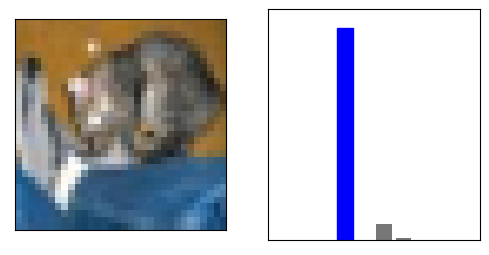

In [10]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')


i = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()